# PA005 - High Value Customers Identification (Insiders)

## 0.0 Planejamento da Solução (IOT)

### Input - Entrada

1. Problema de negócio
- Selecionar os clientes mais valiosos para integrar um programa de fidelização.
2. Conjunto de Dados
- Vendas de um e-commerce, durante um certo período.

### Output  - Saída
1. A indicação das pessoas que farão parte do programa de Insiders.
- Lista: client_id| is_insider |

2. Relatório com as respostas das perguntas de negócio.
- Quem são as pessoas elegíveis para participar do programa de Insiders?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes?
- Qual a % de contribuição do faturamento, vinda do Insiders?
- Qual a expectativa de faturamento desse grupo para os próximos meses?
- Quais as condições para uma pessoa ser elegível ao Insiders?
- Quais as condições para uma pessoa ser removida do Insiders?
- Qual a garantia que o programa Insiders é melhor que o restante da base?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas


1. Quem são as pessoas elegíveis para participar do programa de Insiders?
    - O que é ser elegível? O que são clientes de alto "valor"?
    - Faturamento:
        - Alto ticket médio.
        - Alto LTV.
        - Baixa Recência.
        - Alto basket size.
        - Baixa probabilidade de Churn.
        - Alta Previsão LTV.
        - Alta propensão de compra.

    - Custo:
        - Baixa taxa de devolução.
    
    - Experiência de compra:
        - Média alta das avaliações.

2. Quantos clientes farão parte do grupo?
    - Número total de clientes.
    - % do grupo Insiders.

3. Quais as principais características desses clientes?
    - Escrever características dos clientes:
        - Idade
        - Salário
        - Localização
    
    - Escrever características de consumo:
        - Atributos de clusterização

4. Qual a % de contribuição do faturamento, vinda do Insiders?
    - Faturamento total do ano.
    - Faturamento do grupo Insiders.

5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - Previsão do LTV do grupo Insiders.
    - Análise de Cohort.

6. Quais as condições para uma pessoa ser elegível ao Insiders?
    - Definir a periodicidade ( 1 mês, 3 meses)
    - A pessoa precisa ser similar ou parecido com uma pessoa do grupo.
7. Quais as condições para uma pessoa ser removida do Insiders?
    - Definir a periodicidade ( 1 mês, 3 meses)
    - A pessoa precisa ser desimilar ou não-parecido com uma pessoa do grupo.
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Teste A/B.
    - teste A/B Bayesiano.
    - Teste de hióteses.
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto.
    - Preferência de compra.
    - Frete.
    - Visita a empresa.

## Benchmark de soluções

### 1.0 Desk Research

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from yellowbrick.cluster import KElbowVisualizer
from plotly import express as px
from matplotlib import pyplot as plt
from sklearn import cluster as c
from sklearn import metrics as mt

## 0.1 Helper Functions

## 0.2 Loading Dataset

In [2]:
# load data
df_raw = pd.read_csv('../data/Ecommerce.csv', encoding='latin1')

# drop extra column
df_raw = df_raw.drop('Unnamed: 8', axis = 1)

# 1.0 Descrição dos Dados

In [3]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [4]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id','country']
df1.columns = cols_new

## 1.2 Data Dimensions, Types e NA

In [5]:
df1.shape

(541909, 8)

## 1.3 Datatypes

In [6]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [7]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [8]:
# remove na
df1 = df1.dropna(subset=['description','customer_id'])

print(f'Removed data: {1-(df1.shape[0] / df_raw.shape[0])}%')

Removed data: 0.24926694334288602%


## 1.6 Change Datatypes

In [9]:
# invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

## 1.7 Descriptive Statistics

# 2.0 Feature Enginnering

In [32]:
df2 = df1.copy()

## 2.1 Feature Creation

In [33]:
# data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description','quantity','invoice_date','unit_price','country'], axis = 1).drop_duplicates(ignore_index = True)

In [34]:
# Gross Revenue (Faturamento) quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']
# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on ='customer_id', how='left')

# Recency - Last day purchase
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on ='customer_id', how='left')

# Frequency 
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on ='customer_id', how='left')


# 3.0 Filtragem de Variáveis

In [35]:
df3 = df_ref.copy()

# 4.0 EDA

In [36]:
df4 = df3.copy()

# 5.0 Data preparation

In [37]:
df5 = df4.copy()

# 6.0 Feature Selection

In [38]:
df6 = df5.copy()

# 7.0 HyperParameter Fine-Tunning

In [39]:
X = df6.drop(columns = ['customer_id'])

In [40]:
clusters = np.arange(2, 7, 1)

## 7.1 Within-Cluster Sum of Square (WSS)

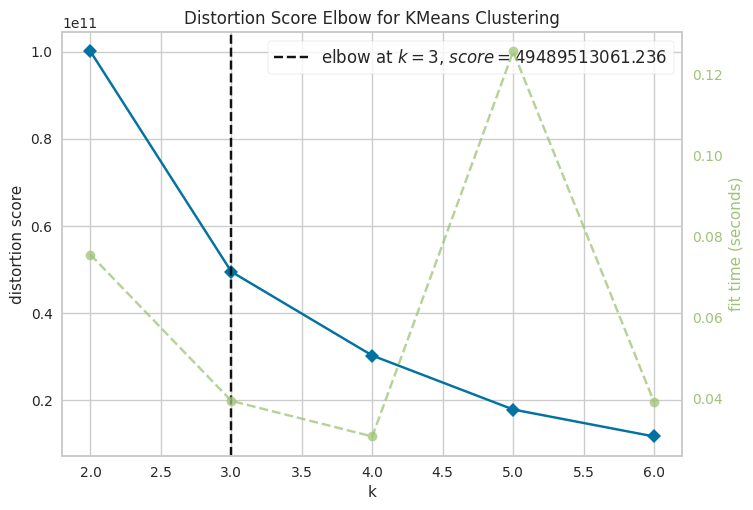

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
plt.rcParams['font.sans-serif'] = 'DejaVu Sans' 
kmeans = KElbowVisualizer(c.KMeans( n_init = 10), k=clusters, timing = True)
kmeans.fit(X)
kmeans.show()

## 7.2 Silhouette Score

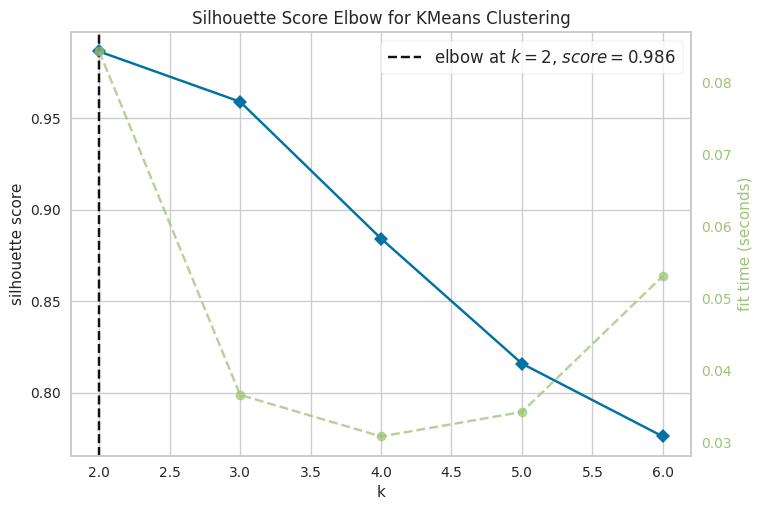

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
kmeans = KElbowVisualizer (c.KMeans( n_init = 10), k=clusters, metric='silhouette', timing = True)
kmeans.fit(X)
kmeans.show()

# 8.0 Model Training

## 8.1 K-Means

In [43]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters = k, n_init= 10, max_iter = 300, random_state = 42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

### 8.2 Cluster Validation

In [44]:
print(f'WSS:{kmeans.inertia_}')
print(f'SS:{mt.silhouette_score(X, labels)}')

WSS:52830442008.00697
SS:0.9494677566681542


# 9.0 Cluster Analysis

In [45]:
df9 = df6.copy()
df9['cluster'] = labels

## 9.1 Visualization Inspection

In [46]:
fig = px.scatter_3d(df9, x='recency_days', y= 'invoice_no', z='gross_revenue', color='cluster')
fig.show()

## 9.2 Cluster Profile

In [47]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


In [48]:
# Number of customers
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100* (df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg gross_revenue
df_gross = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_gross, on='cluster', how='left')

# Avg recency_days
df_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_recency_days, on='cluster', how='left')

# Avg invoice_no
df_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, on='cluster', how='left')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.153705,1372.577826,92.257901,4.614533
1,1,6,0.137237,182181.981667,7.166667,89.000000
2,2,31,0.709058,40543.517742,13.290323,53.290323


### Cluster 01: (Candidato à Insider)
    - Número de Customers: 6 (0.13% do customers)
    - Recência em Média: 7 dias
    - Compras em média no último ano: 89 compras
    - Receita em média no último ano: $182.182,00

### Cluster 02: 
    - Número de Customers: 31 (0.71% do customers)
    - Recência em Média: 14 dias
    - Compras em média no último ano: 53 compras
    - Receita em média no último ano: $40.543,52

### Cluster 03: 
    - Número de Customers: 4335 (99% do customers)
    - Recência em Média: 92 dias
    - Compras em média no último ano: 5 compras
    - Receita em média no último ano: $1.372,57

# 10.0 Deploy To Production